# Hackathon Cajamar - Reto Atmira Stock - Notebook de predicción
Autores: Daniel Corral Ruiz, Antonio Pascual Hernández, Diego Senso González.

# Objetivo
El objetivo del presente notebook es utilizar los datos ya tratados en el notebook de exploración y lanzar diferentes modelos para finalmente elegir uno de ellos, que será el que se utilice para predecir las ventas futuras.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hackathon-Cajamar---Reto-Atmira-Stock---Notebook-de-predicción" data-toc-modified-id="Hackathon-Cajamar---Reto-Atmira-Stock---Notebook-de-predicción-1">Hackathon Cajamar - Reto Atmira Stock - Notebook de predicción</a></span></li><li><span><a href="#Objetivo" data-toc-modified-id="Objetivo-2">Objetivo</a></span><ul class="toc-item"><li><span><a href="#Librerías-y-paquetes" data-toc-modified-id="Librerías-y-paquetes-2.1">Librerías y paquetes</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.2">Dataset</a></span></li></ul></li><li><span><a href="#Modelos" data-toc-modified-id="Modelos-3">Modelos</a></span><ul class="toc-item"><li><span><a href="#Tratamiento-previo" data-toc-modified-id="Tratamiento-previo-3.1">Tratamiento previo</a></span></li><li><span><a href="#Separación-por-categorías" data-toc-modified-id="Separación-por-categorías-3.2">Separación por categorías</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-3.3">Lasso</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-3.4">Gradient Boosting</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.5">XGBoost</a></span></li><li><span><a href="#Árboles-de-decisión" data-toc-modified-id="Árboles-de-decisión-3.6">Árboles de decisión</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.7">Random Forest</a></span></li></ul></li><li><span><a href="#Métrica" data-toc-modified-id="Métrica-4">Métrica</a></span></li><li><span><a href="#Predicción-sobre-los-nuevos-datos" data-toc-modified-id="Predicción-sobre-los-nuevos-datos-5">Predicción sobre los nuevos datos</a></span></li><li><span><a href="#Exportación-de-la-predicción-a-entregar" data-toc-modified-id="Exportación-de-la-predicción-a-entregar-6">Exportación de la predicción a entregar</a></span></li></ul></div>

## Librerías y paquetes

In [1]:
#Importar paquetes necesarios para el estudio.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn import tree
from scipy.stats import sem
from sklearn.model_selection import cross_val_score, KFold
from sklearn import preprocessing
import datetime
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

<ipython-input-1-b049a87af506>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## Dataset

El dataset que se utilizará para modelar y entrenar los modelos representa los datos de ventas de diferentes productos de PcComponentes en diferentes días. En total, cuenta con  observaciones y  variables:

- **fecha**: el día al que pertenecen los datos.
- **id**: el identificador del producto.
- **visitas**: cantidad de visitas que usuarios han hecho a ese producto en la página web.
- **categoria_uno**: categoría principal a la que pertenece el producto.
- **categoria_dos**: categoría secundaria a la que pertenece el producto.
- **estado**: si el producto se encuenta en stock (No rotura), no está disponible (Rotura), o pendiente de entrega inminente (Tránsito).
- **precio**: precio de compra del producto.
- **dia_atipico**: si se trata de un día de alta demanda (valor = 1), baja demanda (valor = -1), o normal (valor = 0).
- **campaña**: si el producto se encuentra en campaña promocional (valor = 1), o no (valor = 0).
- **antiguedad**: número de días que lleva el producto en el catálogo.

In [2]:
#Carga del dataset para modelar y tratamiento previo.
data = pd.read_csv('../data/data_original.csv', sep = ',', parse_dates = [1])
data = data.drop(data.columns[[0]], axis='columns')
data.drop(['categoria_dos'], axis='columns', inplace = True)
data.drop(['id'], axis='columns', inplace = True)
data.drop(['fecha'], axis = 'columns', inplace = True)
data

,visitas,precio,campaña,antiguedad,unidades_vendidas,atipico_campaña,cobro,precio_mediano_categ1,precio_mediano_categ2,visitas_mediano_categ1,...,N,O,No Rotura,Transito,-1,0,1,lagprice,lagvisitas,lagantiguedad
0,5.0,6.07,0,5241.000000,3,0,0.0,8.82,14.09,10.0,...,0,0,1,0,0,1,0,6.07,5.0,5241.000000
1,5.0,6.12,0,2954.000000,3,0,0.0,8.82,7.41,10.0,...,0,0,1,0,0,1,0,6.12,5.0,2954.000000
2,10.0,8.05,0,5310.000000,42,0,0.0,15.40,8.25,5.0,...,0,0,1,0,0,1,0,8.05,10.0,5310.000000
3,10.0,26.24,0,3069.000000,9,0,0.0,24.67,31.72,45.0,...,0,0,1,0,0,1,0,26.24,10.0,3069.000000
4,10.0,14.18,0,5159.000000,3,0,0.0,24.67,11.99,45.0,...,0,0,1,0,0,1,0,14.18,10.0,5159.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429569,1285.0,19.23,0,133.000000,81,0,1.0,21.16,17.56,25.0,...,0,0,1,0,0,1,0,19.15,770.0,133.000000
1429570,6575.0,81.28,0,452.872633,30,0,1.0,57.55,70.44,50.0,...,0,0,1,0,0,1,0,81.28,5485.0,452.872633
1429571,1395.0,50.38,0,130.000000,9,0,1.0,57.55,70.44,50.0,...,0,0,1,0,0,1,0,50.38,1560.0,130.000000
1429572,1385.0,70.85,0,126.000000,0,0,1.0,26.46,47.58,40.0,...,0,0,1,0,0,1,0,70.85,905.0,126.000000


In [3]:
#Carga del dataset para estimar y tratamiento previo.
data_nuevo = pd.read_csv('../data/data_nuevo.csv', sep = ',', parse_dates = [1])
data_nuevo = data_nuevo.drop(data_nuevo.columns[[0]], axis='columns')
data_nuevo.drop(['categoria_dos'], axis='columns', inplace = True)
data_nuevo.drop(['id'], axis='columns', inplace = True)
data_nuevo.drop(['fecha'], axis = 'columns', inplace = True)
#Tratamiento de Rotura
# data_nuevo['Rotura'] = 0
data_nuevo

,visitas,precio,campaña,antiguedad,atipico_campaña,cobro,precio_mediano_categ1,precio_mediano_categ2,visitas_mediano_categ1,visitas_mediano_categ2,...,N,O,No Rotura,Transito,-1,0,1,lagprice,lagvisitas,lagantiguedad
0,5,5.84,0,5150,0,1.0,8.43,7.37,20.0,15.0,...,0,0,1,0,0,1,0,5.84,5.0,5150.0
1,15,5.84,0,5150,0,1.0,8.43,7.37,20.0,15.0,...,0,0,1,0,0,1,0,5.84,5.0,5150.0
2,5,5.84,0,5150,0,1.0,8.43,7.37,20.0,15.0,...,0,0,1,0,0,1,0,5.84,15.0,5150.0
3,5,5.84,0,5150,0,1.0,8.43,7.37,20.0,15.0,...,0,0,1,0,0,1,0,5.84,5.0,5150.0
4,0,5.84,0,5150,0,1.0,8.43,7.37,20.0,15.0,...,0,0,1,0,0,1,0,5.84,5.0,5150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212836,1085,70.85,0,35,0,1.0,17.88,53.08,65.0,350.0,...,0,0,1,0,0,0,1,70.85,1165.0,35.0
212837,965,70.85,0,35,0,1.0,17.88,53.08,65.0,350.0,...,0,0,1,0,0,0,1,70.85,1085.0,35.0
212838,1005,70.85,0,35,0,1.0,17.88,53.08,65.0,350.0,...,0,0,1,0,0,0,1,70.85,965.0,35.0
212839,745,70.85,0,35,0,1.0,17.88,53.08,65.0,350.0,...,0,0,1,0,0,0,1,70.85,1005.0,35.0


In [4]:
#Información de las variables  del dataset a modelar.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429574 entries, 0 to 1429573
Data columns (total 46 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   visitas                        1429574 non-null  float64
 1   precio                         1429574 non-null  float64
 2   campaña                        1429574 non-null  int64  
 3   antiguedad                     1429574 non-null  float64
 4   unidades_vendidas              1429574 non-null  int64  
 5   atipico_campaña                1429574 non-null  int64  
 6   cobro                          1429574 non-null  float64
 7   precio_mediano_categ1          1429574 non-null  float64
 8   precio_mediano_categ2          1429574 non-null  float64
 9   visitas_mediano_categ1         1429574 non-null  float64
 10  visitas_mediano_categ2         1429574 non-null  float64
 11  antiguedad_mediano_categ1      1429574 non-null  float64
 12  antiguedad_med

In [5]:
#Información de las variables del dataset a estimar.
data_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212841 entries, 0 to 212840
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   visitas                        212841 non-null  int64  
 1   precio                         212841 non-null  float64
 2   campaña                        212841 non-null  int64  
 3   antiguedad                     212841 non-null  int64  
 4   atipico_campaña                212841 non-null  int64  
 5   cobro                          212841 non-null  float64
 6   precio_mediano_categ1          212841 non-null  float64
 7   precio_mediano_categ2          212841 non-null  float64
 8   visitas_mediano_categ1         212841 non-null  float64
 9   visitas_mediano_categ2         212841 non-null  float64
 10  antiguedad_mediano_categ1      212841 non-null  int64  
 11  antiguedad_mediano_categ2      212841 non-null  float64
 12  precio_id                     

# Modelos

## Tratamiento previo

In [132]:
#Separación de las variables en exógenas y endógena.

# endógena

endogena = ['unidades_vendidas']

# exógenas

exogenas = list(set(list(data.columns))-set(endogena))

# Pruebas de generación de modelos para cada categoria_uno.
# f0 = data['A'] == 1
# data = data[f0]

X = data[exogenas].values
Y = data[endogena].values

In [133]:
#Se observan las variables exógenas.
exogenas

['antiguedad_mediano_categ2',
 'G',
 'atipico_campaña',
 'Transito',
 'A',
 'K',
 'precio',
 'lagantiguedad',
 'D',
 'F',
 'precio_mediano_categ1',
 'antiguedad_mediano_categ1',
 '-1',
 'B',
 'visitas_mediano_categ2',
 'visitas_mediano_categ1',
 'O',
 'No Rotura',
 'campaña',
 'H',
 'visitas_id',
 'L',
 'cobro',
 'visitas_dia_atipico_categ2',
 'antiguedad_id',
 'visitas_dia_atipico_id',
 'antiguedad_dia_atipico_categ2',
 'I',
 'antiguedad_dia_atipico_id',
 'C',
 'visitas_dia_atipico_categ1',
 'lagvisitas',
 'E',
 'precio_dia_atipico_categ2',
 'antiguedad',
 '0',
 '1',
 'precio_id',
 'lagprice',
 'N',
 'precio_dia_atipico_categ1',
 'precio_dia_atipico_id',
 'visitas',
 'antiguedad_dia_atipico_categ1',
 'precio_mediano_categ2']

In [134]:
#Creación de las muestras de entrenamiento y test.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.01)
y_train = pd.DataFrame(y_train, columns = ['unidades_vendidas'])
y_test = pd.DataFrame(y_test, columns = ['unidades_vendidas'])

## Separación por categorías

## Lasso

In [82]:
#Entrenamiento de modelo lasso.
lassocv = LassoCV(alphas = None, cv = 10, normalize = True)
lassocv.fit(x_train, y_train)
lassocv.alpha_

model_lasso = Lasso(alpha=lassocv.alpha_) # lasso function
model_lasso.fit(x_train, y_train)

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.06741251586936, tolerance: 158.54971272397353
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641.075416271342, tolerance: 158.54971272397353
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827.7963908377569, tolerance: 154.7479001043324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652.9547051859554, tolerance: 154.7479001043324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 618.2406000853516, tolerance: 154.7479001043324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\diego\anaconda3\envs\gradiente\lib\site-

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.9950408556033, tolerance: 158.9902094261736
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308.4175670458935, tolerance: 158.9902094261736
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924.250760698691, tolerance: 158.9902094261736
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\diego\anaconda3\envs\gradiente\lib\site-p

Lasso(alpha=9.908481901972785e-06)

In [83]:
#Selección de los coeficientes de las variables y ordenación según su importancia.
lasso_coefficients = pd.DataFrame(model_lasso.coef_, exogenas, columns = ['Coefficients'])
important_variables = lasso_coefficients
lasso_coefficients.sort_values(['Coefficients'], ascending = False)

,Coefficients
atipico_campaña,8.695202
precio_dia_atipico_categ2,4.583590
Transito,3.194070
visitas_mediano_categ2,1.129593
1,0.769068
precio_id,0.312958
precio_dia_atipico_id,0.273996
visitas_dia_atipico_id,0.152968
visitas,0.090604
visitas_dia_atipico_categ2,0.055493


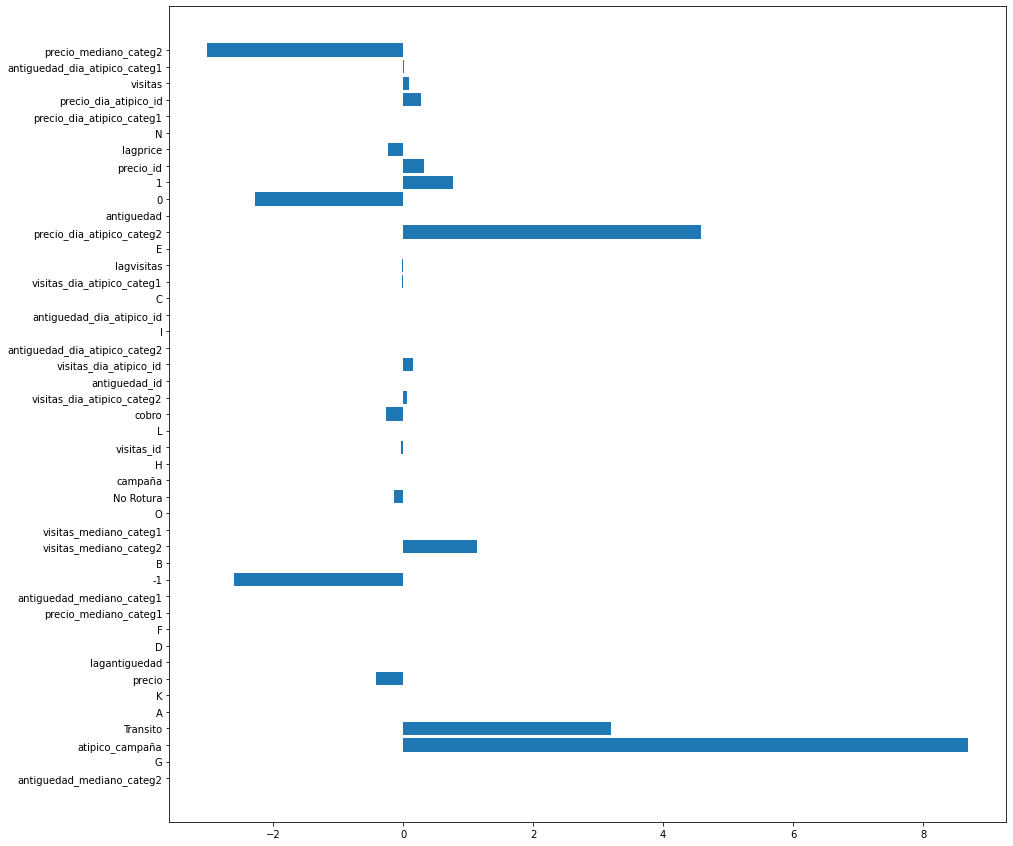

In [89]:
#Representación gráfica de las variables más importantes.
plt.figure(figsize=(15,15))
height = important_variables.Coefficients
bars = important_variables.index
y_pos = np.arange(len(bars))

# Creación de barras horizontales.
plt.barh(y_pos, height)
 
# Nombres en el eje Y.
plt.yticks(y_pos, bars)
 
# Gráfico.
plt.show()

## Gradient Boosting

In [135]:
#Entenamiento del modelo.
clf = GradientBoostingRegressor(n_estimators=500, learning_rate=0.25,
        max_depth=1).fit(x_train, y_train)

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [136]:
#Predicción sobre los datos de test.
pred_y = clf.predict(x_test)
pred_y

array([ 4.20585215, 12.93840029, -0.14205238, ...,  6.66731305,
       -1.95410804,  0.93708877])

In [137]:
#Tratamiento para comparar predicción y datos reales.
y_test['prediccion'] = pred_y
y_test['diferencia'] = y_test['unidades_vendidas'] - y_test['prediccion']
y_test['caso_favorable'] = y_test['unidades_vendidas'] < y_test['prediccion']
y_test.head(50)

,unidades_vendidas,prediccion,diferencia,caso_favorable
0,0,4.205852,-4.205852,True
1,69,12.938400,56.061600,False
2,0,-0.142052,0.142052,False
3,18,2.056651,15.943349,False
4,3,2.070568,0.929432,False
5,0,1.054784,-1.054784,True
6,0,-1.251626,1.251626,False
7,0,2.644547,-2.644547,True
8,0,2.388666,-2.388666,True
9,0,4.339244,-4.339244,True


In [ ]:
# Se guarda el modelo.
filename = 'gradient_boosting.sav'
pickle.dump(clf, open (filename, 'wb'))
clf = pickle.load(open('gradient_boosting.sav', 'rb'))
clf

In [142]:
# Se carga el modelo guardado previamente.
clf = pickle.load(open('gradient_boosting.sav', 'rb'))

## XGBoost

In [43]:
#Entrenamiento del modelo.
model = xgboost.XGBRegressor(n_estimators = 250)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
#Predicciones sobre el conjunto de test.
pred_y = model.predict(x_test)
pred_y

array([ 0.5682001 ,  2.3041945 , -0.3284821 , ...,  0.56122315,
        7.1434884 ,  1.2513902 ], dtype=float32)

In [45]:
#Adición de la predicción, diferencia y si es un caso favorable para visualizar el resultado.
y_test['prediccion'] = pred_y
y_test['diferencia'] = y_test['unidades_vendidas'] - y_test['prediccion']
y_test['caso_favorable'] = y_test['unidades_vendidas'] <= y_test['prediccion']
y_test.head(20)

,unidades_vendidas,prediccion,diferencia,caso_favorable
0,0,0.568200,-0.568200,True
1,6,2.304194,3.695806,False
2,0,-0.328482,0.328482,False
3,27,23.584663,3.415337,False
4,9,7.602295,1.397705,False
5,6,5.287313,0.712687,False
6,0,2.820791,-2.820791,True
7,3,4.182823,-1.182823,True
8,0,4.467998,-4.467998,True
9,6,3.370757,2.629243,False


## Árboles de decisión

In [117]:
#Construcción del árbol.
rt = DecisionTreeRegressor(criterion = 'mse', max_depth = 50, min_samples_split = 2)

In [118]:
#Entrenamiento del modelo.
model_r = rt.fit(x_train, y_train)

In [119]:
#Predicción sobre los datos de test.
pred_y = model_r.predict(x_test)
pred_y

array([ 0.,  0.,  0., ...,  3., 27., 21.])

In [120]:
#Tratamiento para comparar predicción y datos reales.
y_test['prediccion'] = pred_y
y_test['diferencia'] = y_test['unidades_vendidas'] - y_test['prediccion']
y_test['caso_favorable'] = y_test['unidades_vendidas'] <= y_test['prediccion']
y_test.head(50)

,unidades_vendidas,prediccion,diferencia,caso_favorable
0,0,0.000000,0.000000,True
1,0,0.000000,0.000000,True
2,0,0.000000,0.000000,True
3,0,1.928571,-1.928571,True
4,18,6.000000,12.000000,False
5,6,0.000000,6.000000,False
6,0,6.000000,-6.000000,True
7,3,3.000000,0.000000,True
8,15,3.000000,12.000000,False
9,3,6.000000,-3.000000,True


## Random Forest

In [84]:
#Entrenamiento del modelo.
rf = RandomForestRegressor(n_estimators = 250, random_state = 42)
rf.fit(x_train, y_train)

In [ ]:
#Predicción sobre el test.
pred_y = rf.predict(x_test)
pred_y

In [ ]:
#Tratamiento para comparar predicción y datos reales.
y_test['prediccion'] = pred_y
y_test['diferencia'] = y_test['unidades_vendidas'] - y_test['prediccion']
y_test['caso_favorable'] = y_test['unidades_vendidas'] <= y_test['prediccion']
y_test.head(50)

In [ ]:
#Se guarda el modelo.
filename = 'random_forest.sav'
pickle.dump(rf, open (filename, 'wb'))

In [ ]:
#Carga del modelo guardado previamente.
rf = pickle.load(open('random_forest.sav', 'rb'))

# Métrica

In [138]:
#Porcentaje de casos favorables. Observaciones en los que la predicción está por encima de la demanda.
cf = round((sum(y_test['caso_favorable'] == True)/len(y_test)), 2)
cf

0.58

In [139]:
#Cálculo del rRMSE.
rmse = sqrt(mean_squared_error(y_test['unidades_vendidas'], pred_y))
rrmse = round(rmse/(y_test['unidades_vendidas'].mean()), 2)
rrmse

3.37

(0.7 * rRMSE) + (0.3 * (1 - CF))

In [140]:
#Métrica de la predicción.
metrica = round((0.7 * rrmse) + (0.3 * (1 - cf)), 3)
metrica

2.485

# Predicción sobre los nuevos datos

In [17]:
# #Predecir sobre nuevos datos con XGBoost.
# prediccion = clf.predict(data_nuevo.values)

In [141]:
f0 = data_nuevo['A'] == 1
data_nuevo = data_nuevo[f0]

In [142]:
#Predicción del modelo sobre los datos a estimar.
prediccion = clf.predict(data_nuevo)
prediccion

array([ -9.09138172,  -9.09138172,  -9.09138172, ..., -35.79708772,
       -35.79708772, -35.79708772])

In [143]:
#Inclusión de la predicción en el dataset a estimar.
data_nuevo['prediccion'] = prediccion
data_nuevo

<ipython-input-143-962b3d1d4c81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nuevo['prediccion'] = prediccion


,visitas,precio,campaña,antiguedad,atipico_campaña,cobro,precio_mediano_categ1,precio_mediano_categ2,visitas_mediano_categ1,visitas_mediano_categ2,...,O,No Rotura,Transito,-1,0,1,lagprice,lagvisitas,lagantiguedad,prediccion
649,30,24.91,0,2978,0,1.0,25.59,31.72,125.0,35.0,...,0,1,0,0,1,0,24.91,30.0,2978.0,-9.091382
650,80,24.91,0,2978,0,1.0,25.59,31.72,125.0,35.0,...,0,1,0,0,1,0,24.91,30.0,2978.0,-9.091382
651,20,24.91,0,2978,0,1.0,25.59,31.72,125.0,35.0,...,0,1,0,0,1,0,24.91,80.0,2978.0,-9.091382
652,10,24.91,0,2978,0,1.0,25.59,31.72,125.0,35.0,...,0,1,0,0,1,0,24.91,20.0,2978.0,-9.091382
653,0,24.91,0,2978,0,1.0,25.59,31.72,125.0,35.0,...,0,1,0,0,1,0,24.91,10.0,2978.0,-9.091382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212113,13825,17.55,0,49,0,1.0,25.59,17.56,125.0,110.0,...,0,1,0,0,0,1,17.55,14245.0,49.0,-35.797088
212114,11145,17.56,0,49,0,1.0,25.59,17.56,125.0,110.0,...,0,1,0,0,0,1,17.55,13825.0,49.0,-35.797088
212115,11400,17.56,0,49,0,1.0,25.59,17.56,125.0,110.0,...,0,1,0,0,0,1,17.56,11145.0,49.0,-35.797088
212116,13955,17.55,0,49,0,1.0,25.59,17.56,125.0,110.0,...,0,1,0,0,0,1,17.56,11400.0,49.0,-35.797088


In [144]:
data_nuevo['prediccion'].value_counts()

-9.620426     22338
-9.091382     19045
-8.499593     17525
-10.098560    11853
-7.663606      1825
-5.977044      1487
-5.385256      1225
-39.356432      764
-10.697917      754
-6.506089       751
-38.827387      660
-38.235598      621
 13.628978      382
-39.834565      241
 13.099934      230
-35.797088      226
-7.365340       224
 14.220767      221
 11.106430      197
 10.514641      192
-4.549269       164
-35.121261      149
 9.985596       122
 9.507463        82
-37.790592       77
-40.433922       41
-35.713050       40
 12.621800       37
-6.984222        32
-16.107027       23
-38.911425       15
-19.750409       14
-34.676254       14
 15.056754       12
-16.636072       10
-19.221364       10
-36.242094       10
-37.399612        9
-18.629575        8
 11.942416        8
-16.191065        6
-7.583580         5
-15.515238        4
-17.114205        3
 8.908105         3
 12.022443        3
-36.720227        1
Name: prediccion, dtype: int64

# Exportación de la predicción a entregar

In [51]:
#Construcción del fichero de entrega.
data_nuevo = pd.read_csv('../data/data_nuevo.csv', sep = ',')
data_nuevo = data_nuevo.drop(data_nuevo.columns[[0]], axis='columns')

data_nuevo['UNIDADES'] = prediccion
data_nuevo['FECHA'] = data_nuevo['fecha']
data_nuevo['ID'] = data_nuevo['id']

data_nuevo = data_nuevo.loc[:, ['FECHA', 'ID', 'UNIDADES']]

data_nuevo['FECHA'] = data_nuevo['FECHA'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%d/%m/%Y') if x != "" else "")

In [52]:
#Descarga del fichero
data_nuevo.to_csv(r'../data/prediccion.csv', index = False, sep = '|')